# Leads Scoring Assignment

### Importing Libraries

In [761]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Reading and Understanding the Data

In [762]:
# Read the given csv file
df = pd.read_csv("Leads.csv")

In [763]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect the various Aspects of the dataframe

In [764]:
# Checking the shape of the dataframe
df.shape

(9240, 37)

In [765]:
# Get info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [766]:
# Describing the columns of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [767]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

Handling the 'Select' level that is present in many of the categorical variables. We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.




In [768]:
df = df.replace("Select",np.nan)

In [769]:
# Checking for null values in columns data
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [770]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

##### Dropping the unwanted columns

In [771]:
# Dropping unique valued columns
df= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [772]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [773]:
# Removing all the columns that are no required and have 35% null values
df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','City','Tags','How did you hear about X Education'], axis = 1, inplace = True)

In [774]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [775]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then

In [776]:
df['Specialization'] = df['Specialization'].fillna('not provided')

In [777]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')

In [778]:
df['Country'] = df['Country'].fillna('not provided')

In [779]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [780]:
# Rechecking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [781]:
#checking value_counts of Country
df["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [782]:
# categorizing country column

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']), axis = 1)
df['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [783]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [784]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [785]:
df1 = df[df.isnull().sum(axis=1) <1]

In [786]:
# Code for checking number of rows left in percent
round(100*(df1.shape[0])/(df.shape[0]),2)

98.2

In [787]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [788]:
# To familiarize all the categorical values
for column in df1:
    print(df1[column].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      12

In [789]:
# Removing Id values since they are unique for everyone
df_2 = df1.drop('Prospect ID',1)
df_2.shape

(9074, 22)

## EDA

### Univariate Analysis

In [790]:
# Categorical Variables
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

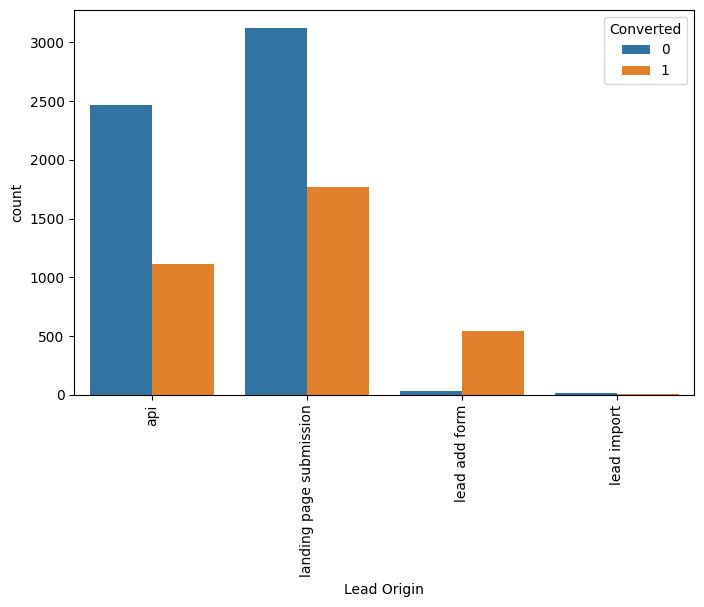

In [791]:
plt.figure(figsize=(8,5))
s1=sns.countplot(x=df_2['Lead Origin'], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

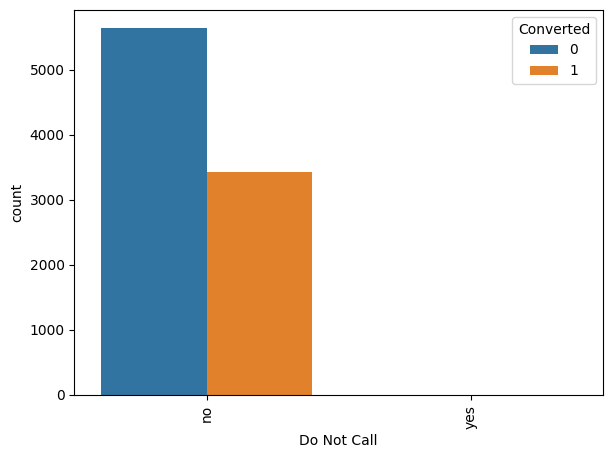

In [792]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(x=df_2['Do Not Call'], hue=df_2.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

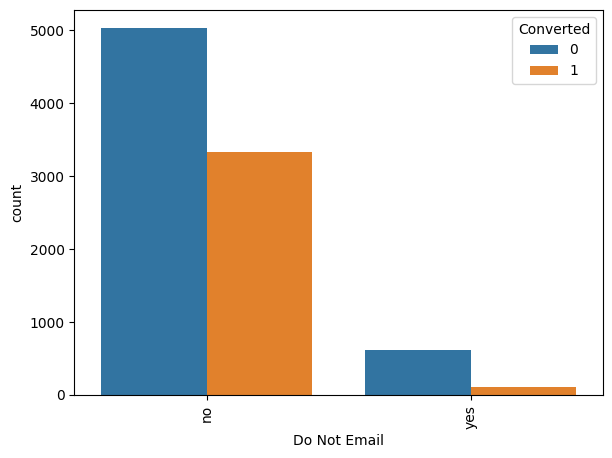

In [793]:
plt.figure(figsize=(15,5))
ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(x=df_2['Do Not Email'], hue=df_2.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

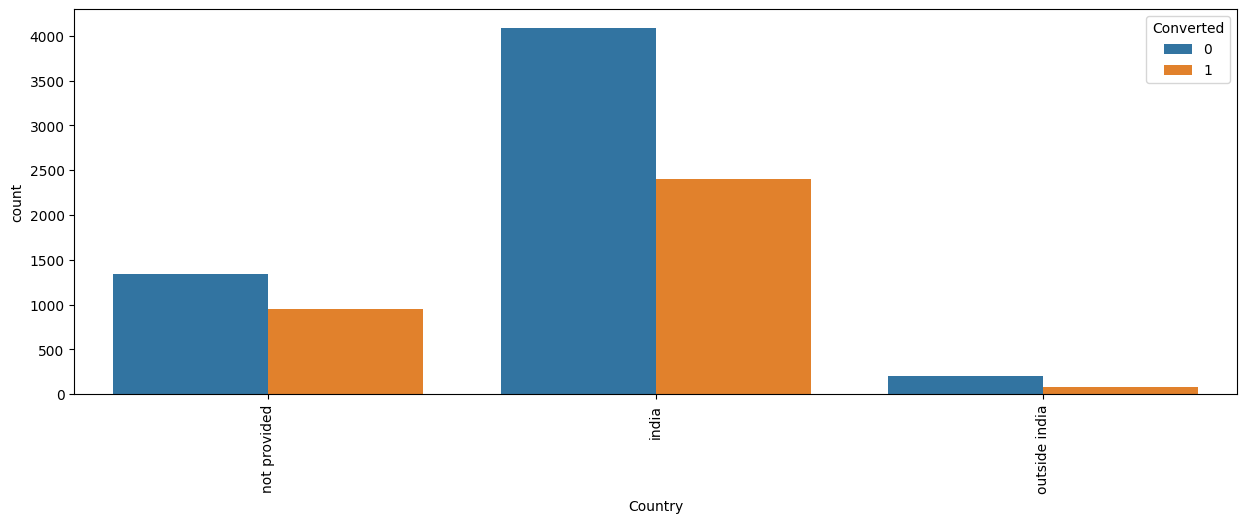

In [794]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2['Country'], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

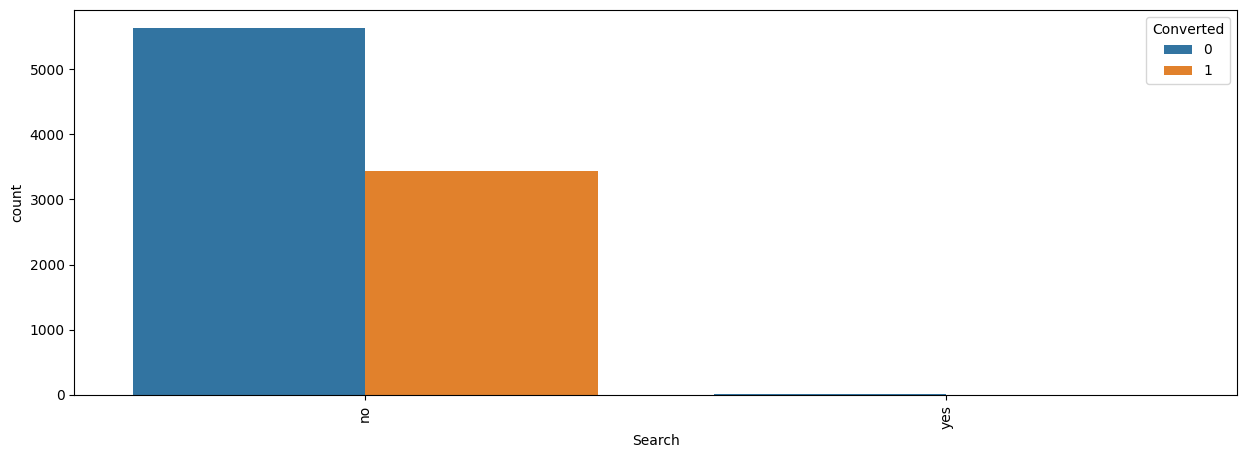

In [795]:
plt.figure(figsize=(15,5))
s2=sns.countplot(x=df_2['Search'], hue=df_2.Converted)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

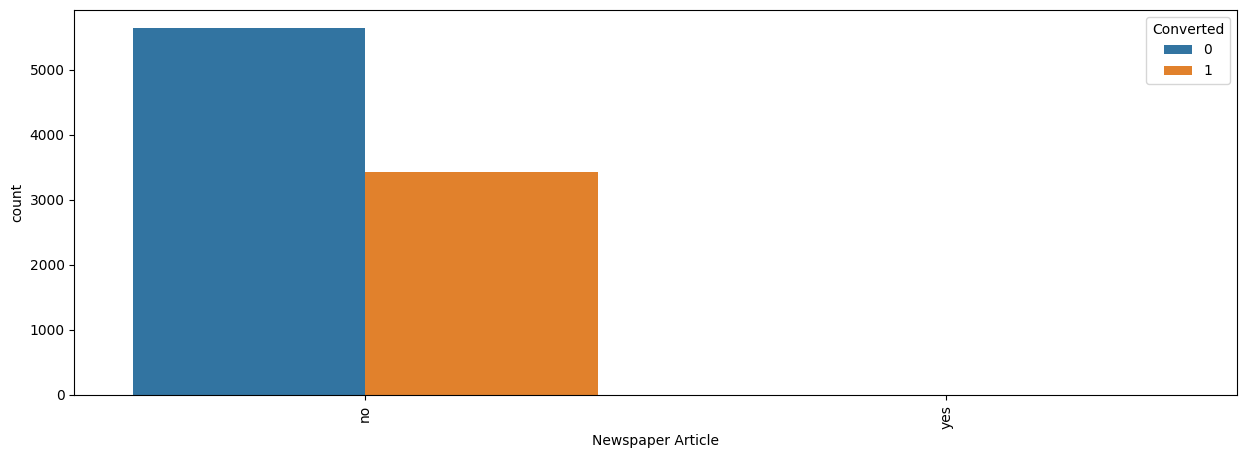

In [796]:
plt.figure(figsize=(15,5))
s3=sns.countplot(x=df_2['Newspaper Article'], hue=df_2.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

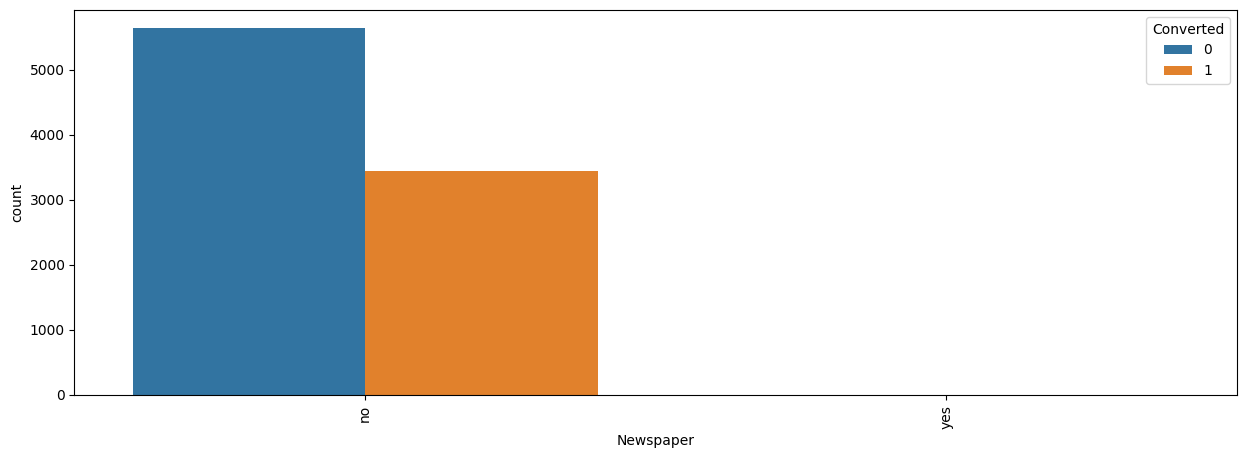

In [797]:
plt.figure(figsize=(15,5))
s4=sns.countplot(x=df_2['Newspaper'], hue=df_2.Converted)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
plt.show()

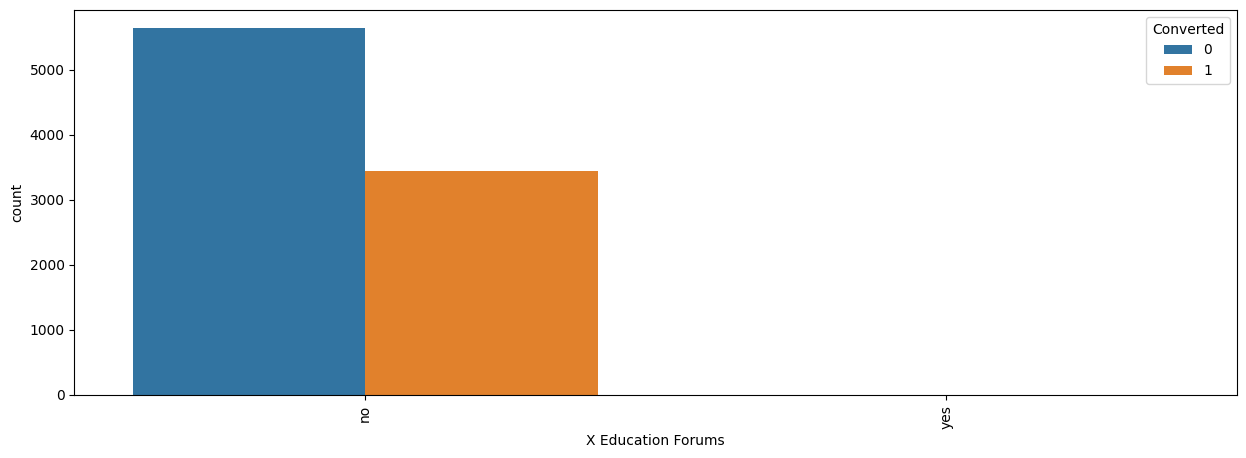

In [798]:
plt.figure(figsize=(15,5))
s5=sns.countplot(x=df_2['X Education Forums'], hue=df_2.Converted)
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)
plt.show()

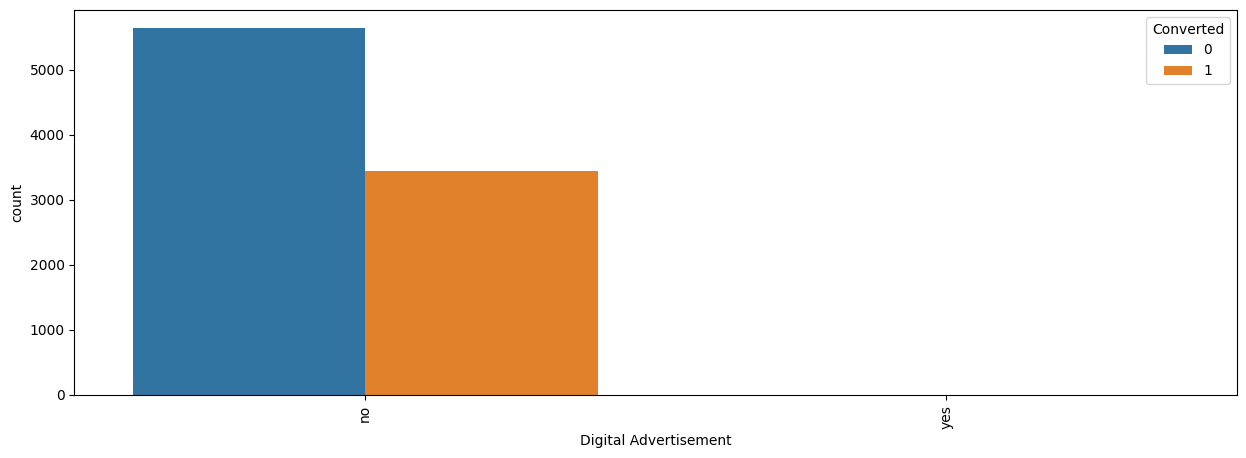

In [799]:
plt.figure(figsize=(15,5))
s6=sns.countplot(x=df_2['Digital Advertisement'], hue=df_2.Converted)
s6.set_xticklabels(s6.get_xticklabels(),rotation=90)
plt.show()

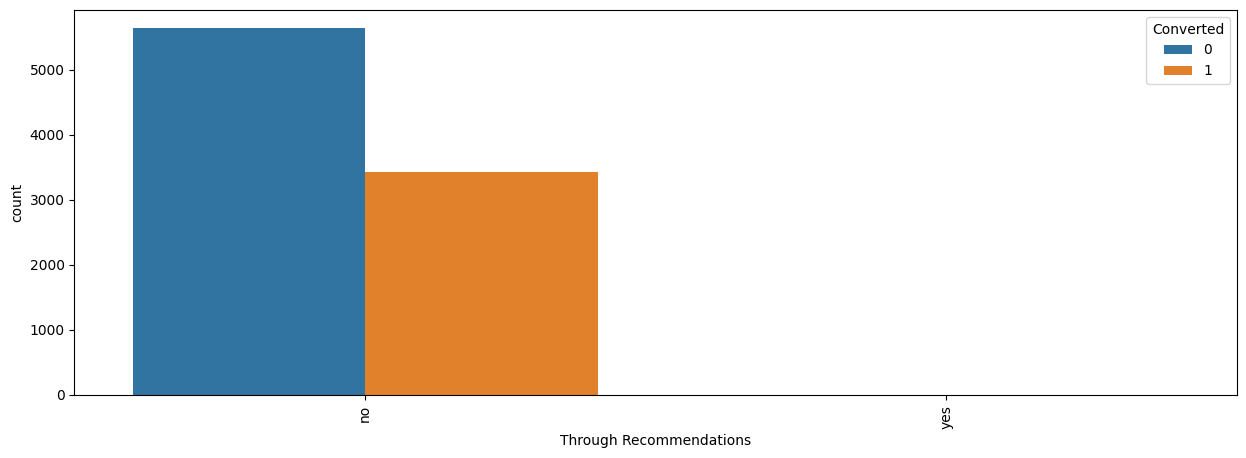

In [800]:
plt.figure(figsize=(15,5))
s7=sns.countplot(x=df_2['Through Recommendations'], hue=df_2.Converted)
s7.set_xticklabels(s7.get_xticklabels(),rotation=90)
plt.show()

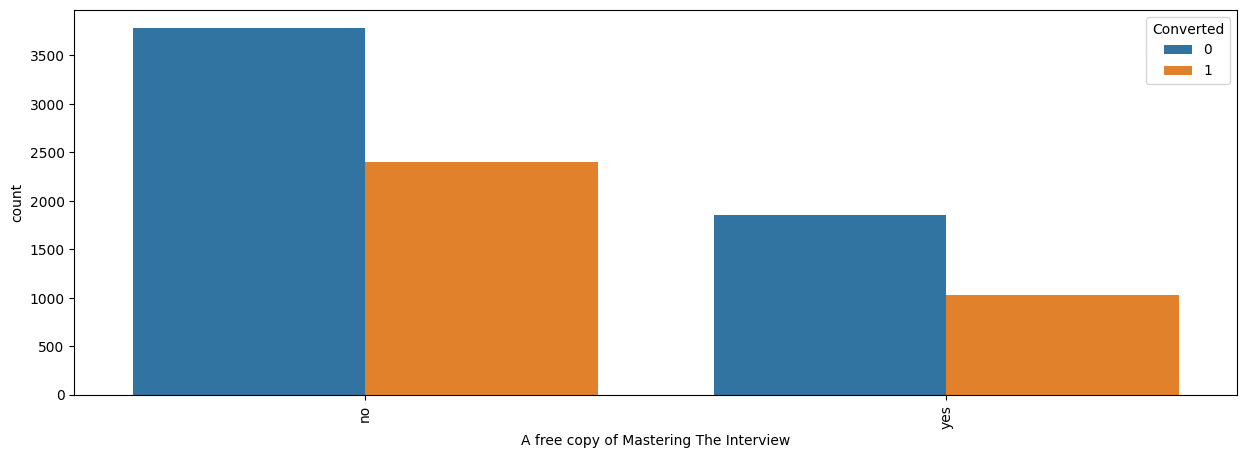

In [801]:
plt.figure(figsize=(15,5))
s8=sns.countplot(x=df_2['A free copy of Mastering The Interview'], hue=df_2.Converted)
s8.set_xticklabels(s8.get_xticklabels(),rotation=90)
plt.show()

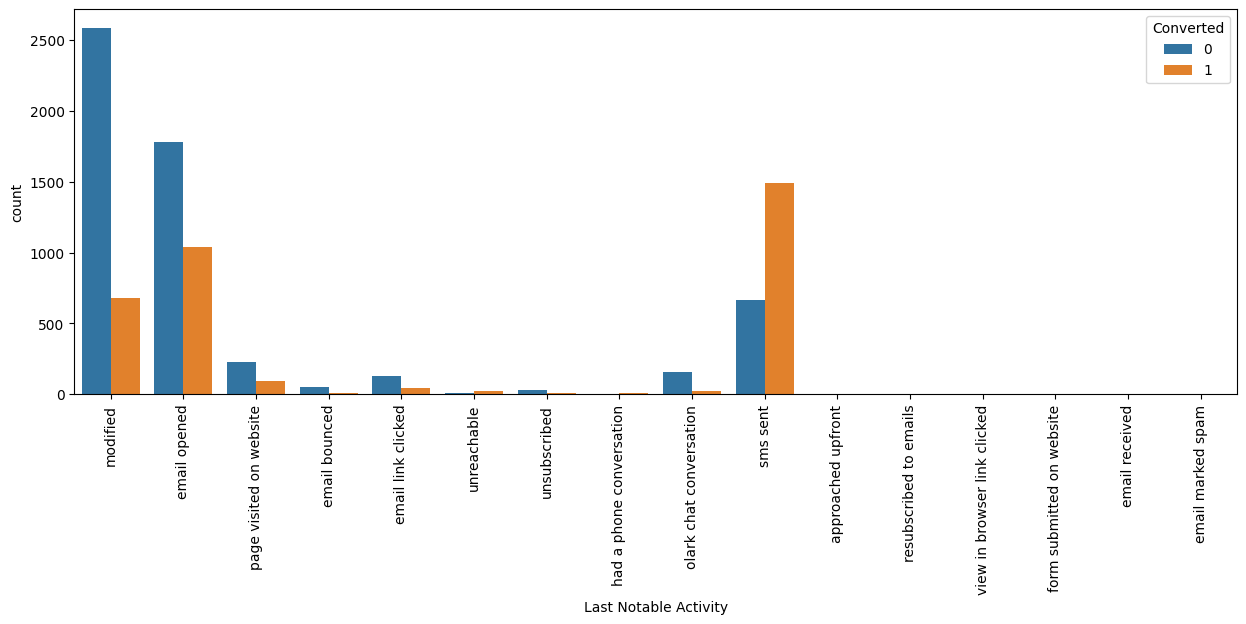

In [802]:
plt.figure(figsize=(15,5))
s9=sns.countplot(x=df_2['Last Notable Activity'], hue=df_2.Converted)
s9.set_xticklabels(s9.get_xticklabels(),rotation=90)
plt.show()

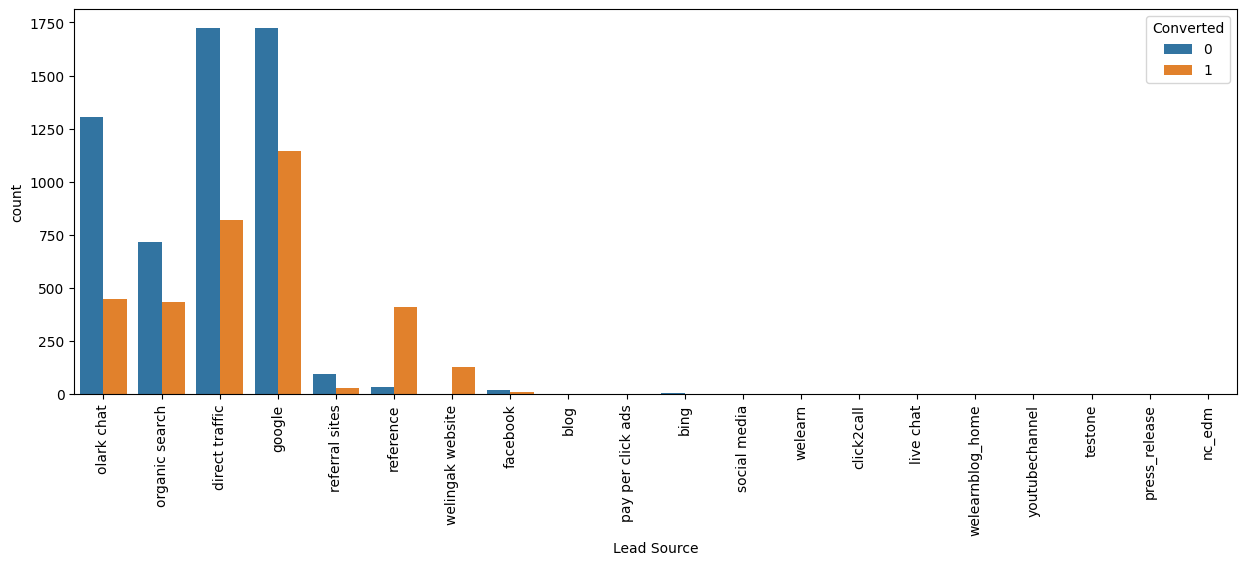

In [803]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2['Lead Source'], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

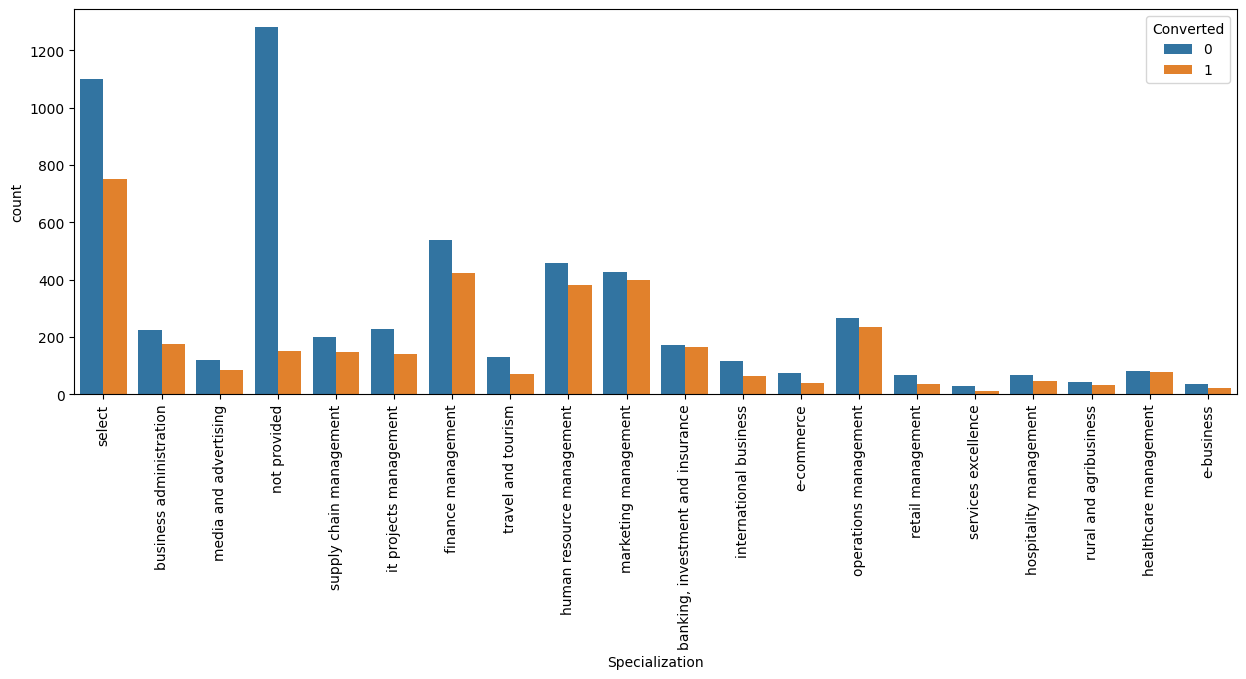

In [804]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2.Specialization, hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

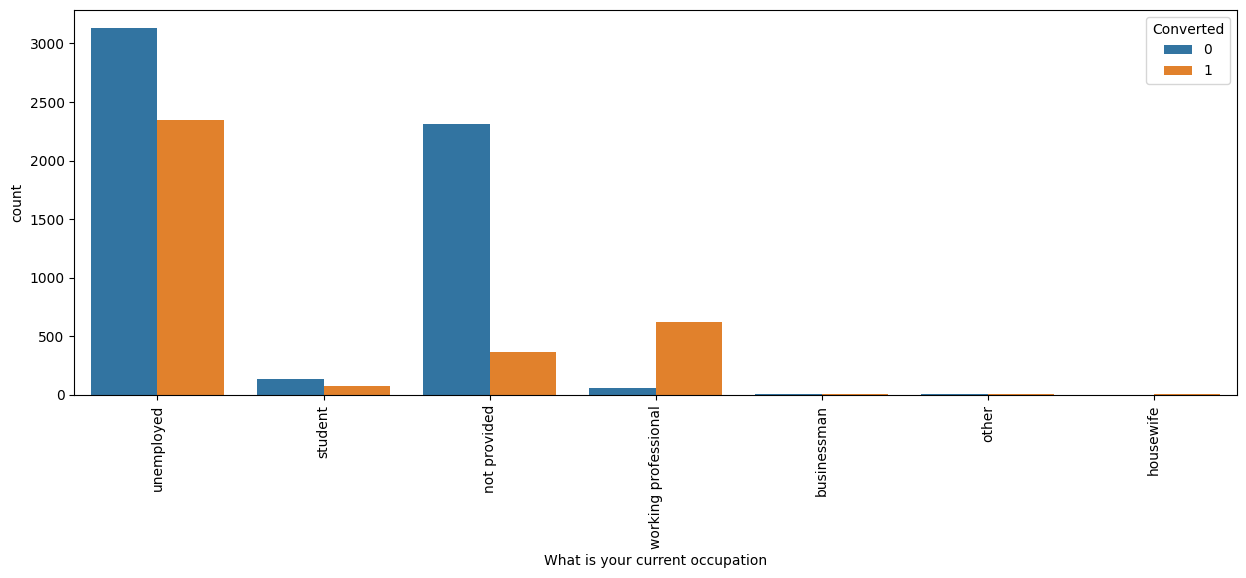

In [805]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2["What is your current occupation"], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

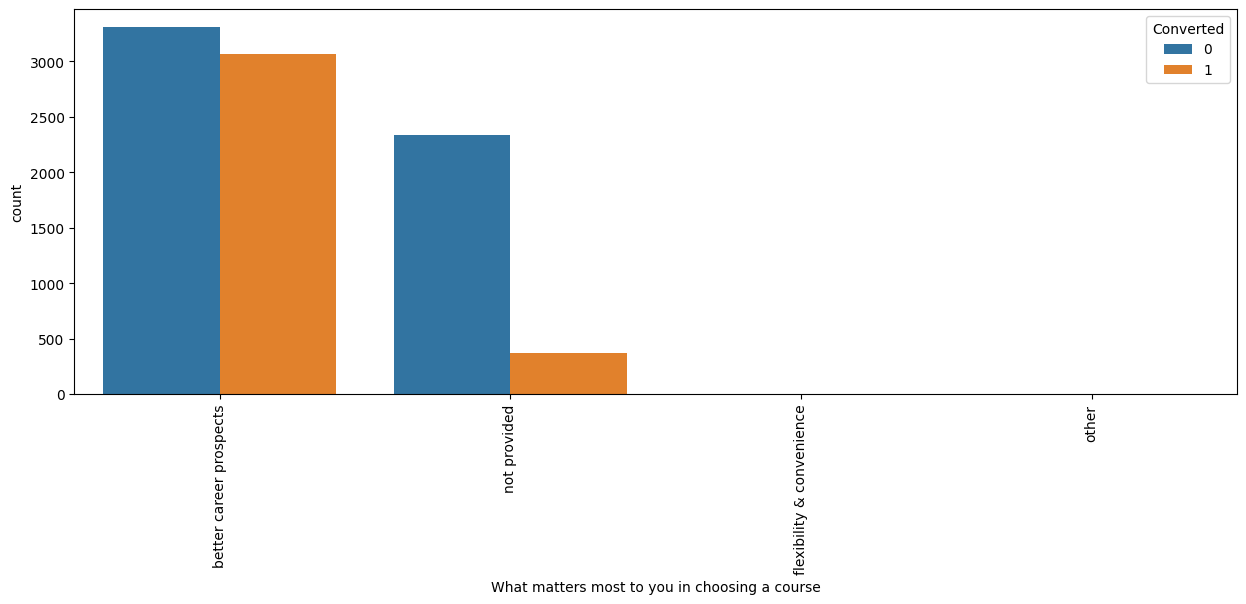

In [806]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2["What matters most to you in choosing a course"], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

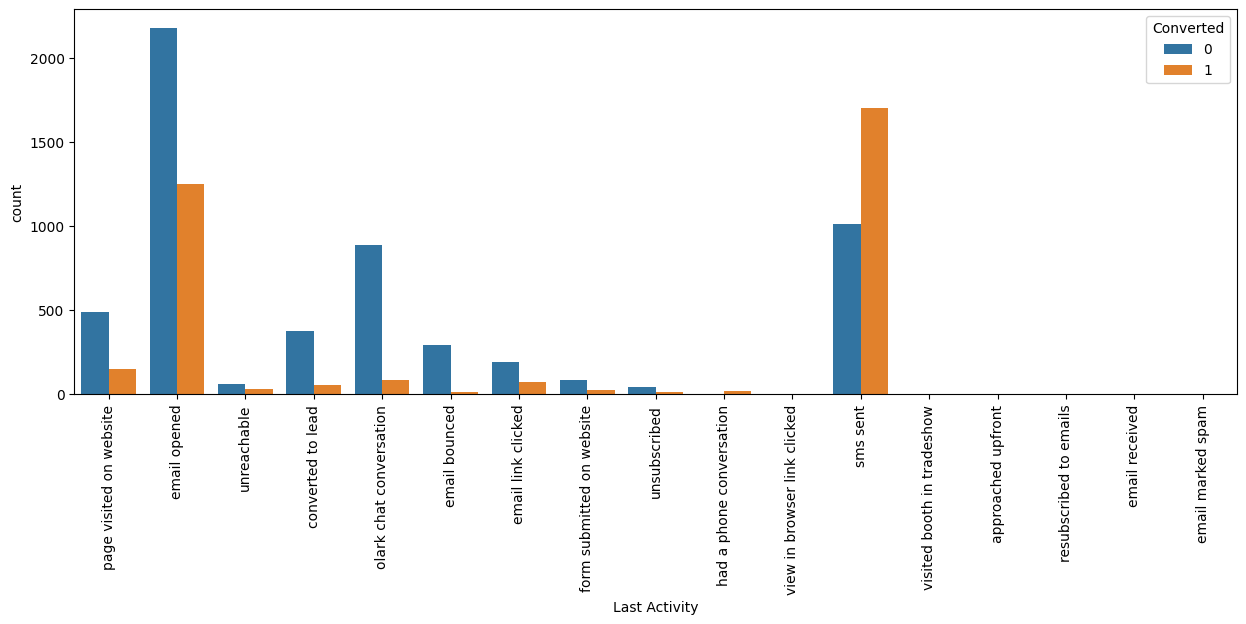

In [807]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x=df_2["Last Activity"], hue=df_2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [808]:
# Numerical Variables
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

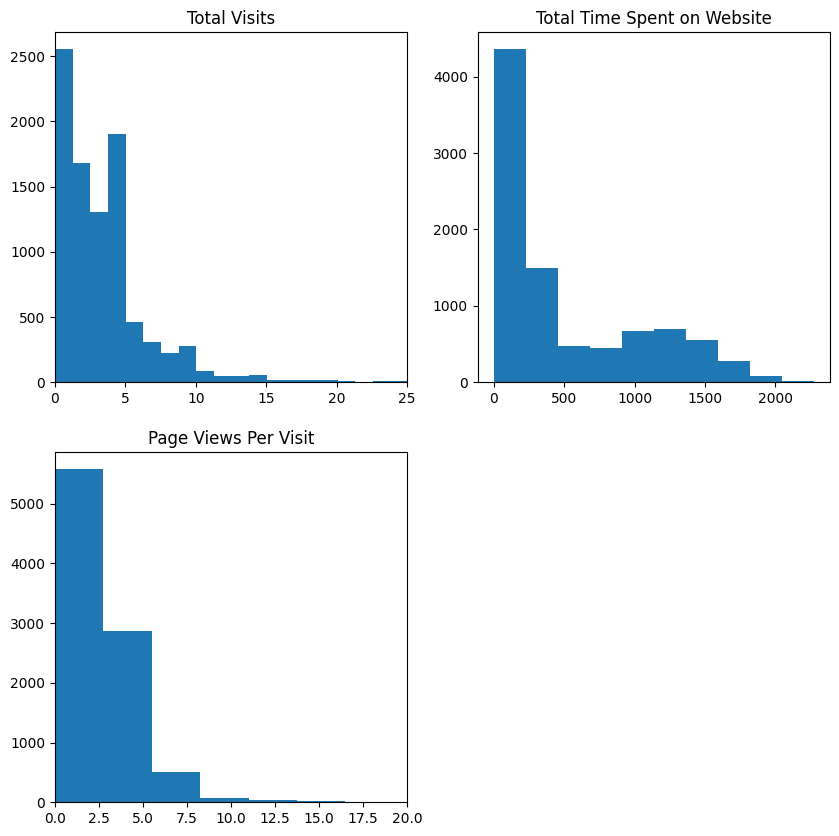

In [809]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_2['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_2['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

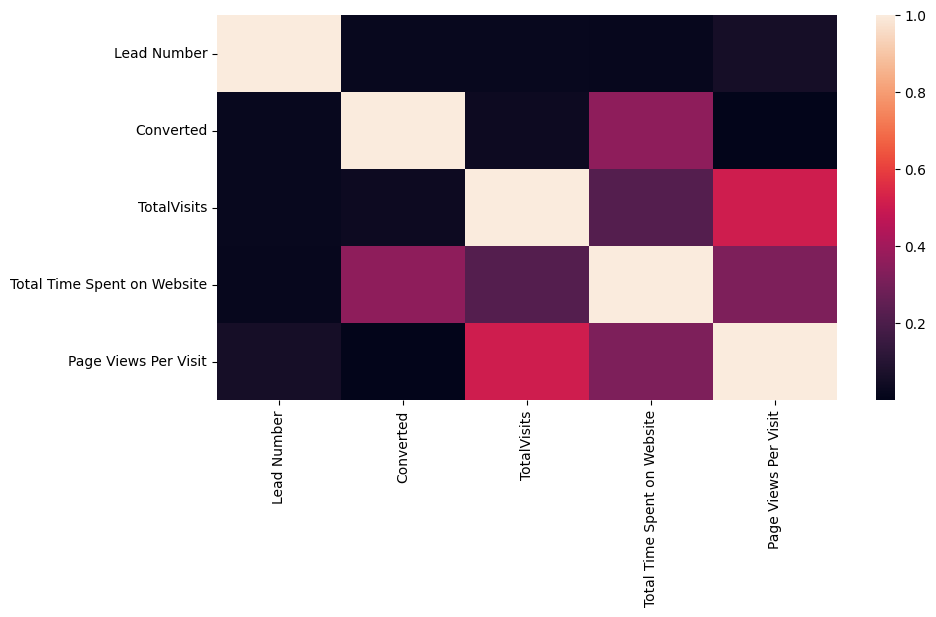

In [810]:
# To check the correlation among varibles

plt.figure(figsize=(10,5))
sns.heatmap(df_2.corr())
plt.show()

 It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

In [811]:
num = df_2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


There aren't any major outliers, so moving on to analysis

## Dummy Variables

In [812]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [813]:
df_2.loc[:, df_2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [814]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_2_dum = pd.concat([df_2, dummy], axis=1)
df_2_dum

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.50,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,...,0,0,0,0,0,0,0,0,0,0
9236,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9237,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9238,579538,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,...,0,0,0,0,0,0,1,0,0,0


In [815]:
df_2_dum = df_2_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_2_dum

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test-Train Split

In [816]:
X = df_2_dum.drop(['Converted'], 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [817]:
# Putting the target variable in y
y = df_2_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [818]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [819]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,646334,0.014184,0.612676,0.083333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,0.042553,0.751761,0.250000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,0.014184,0.787852,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


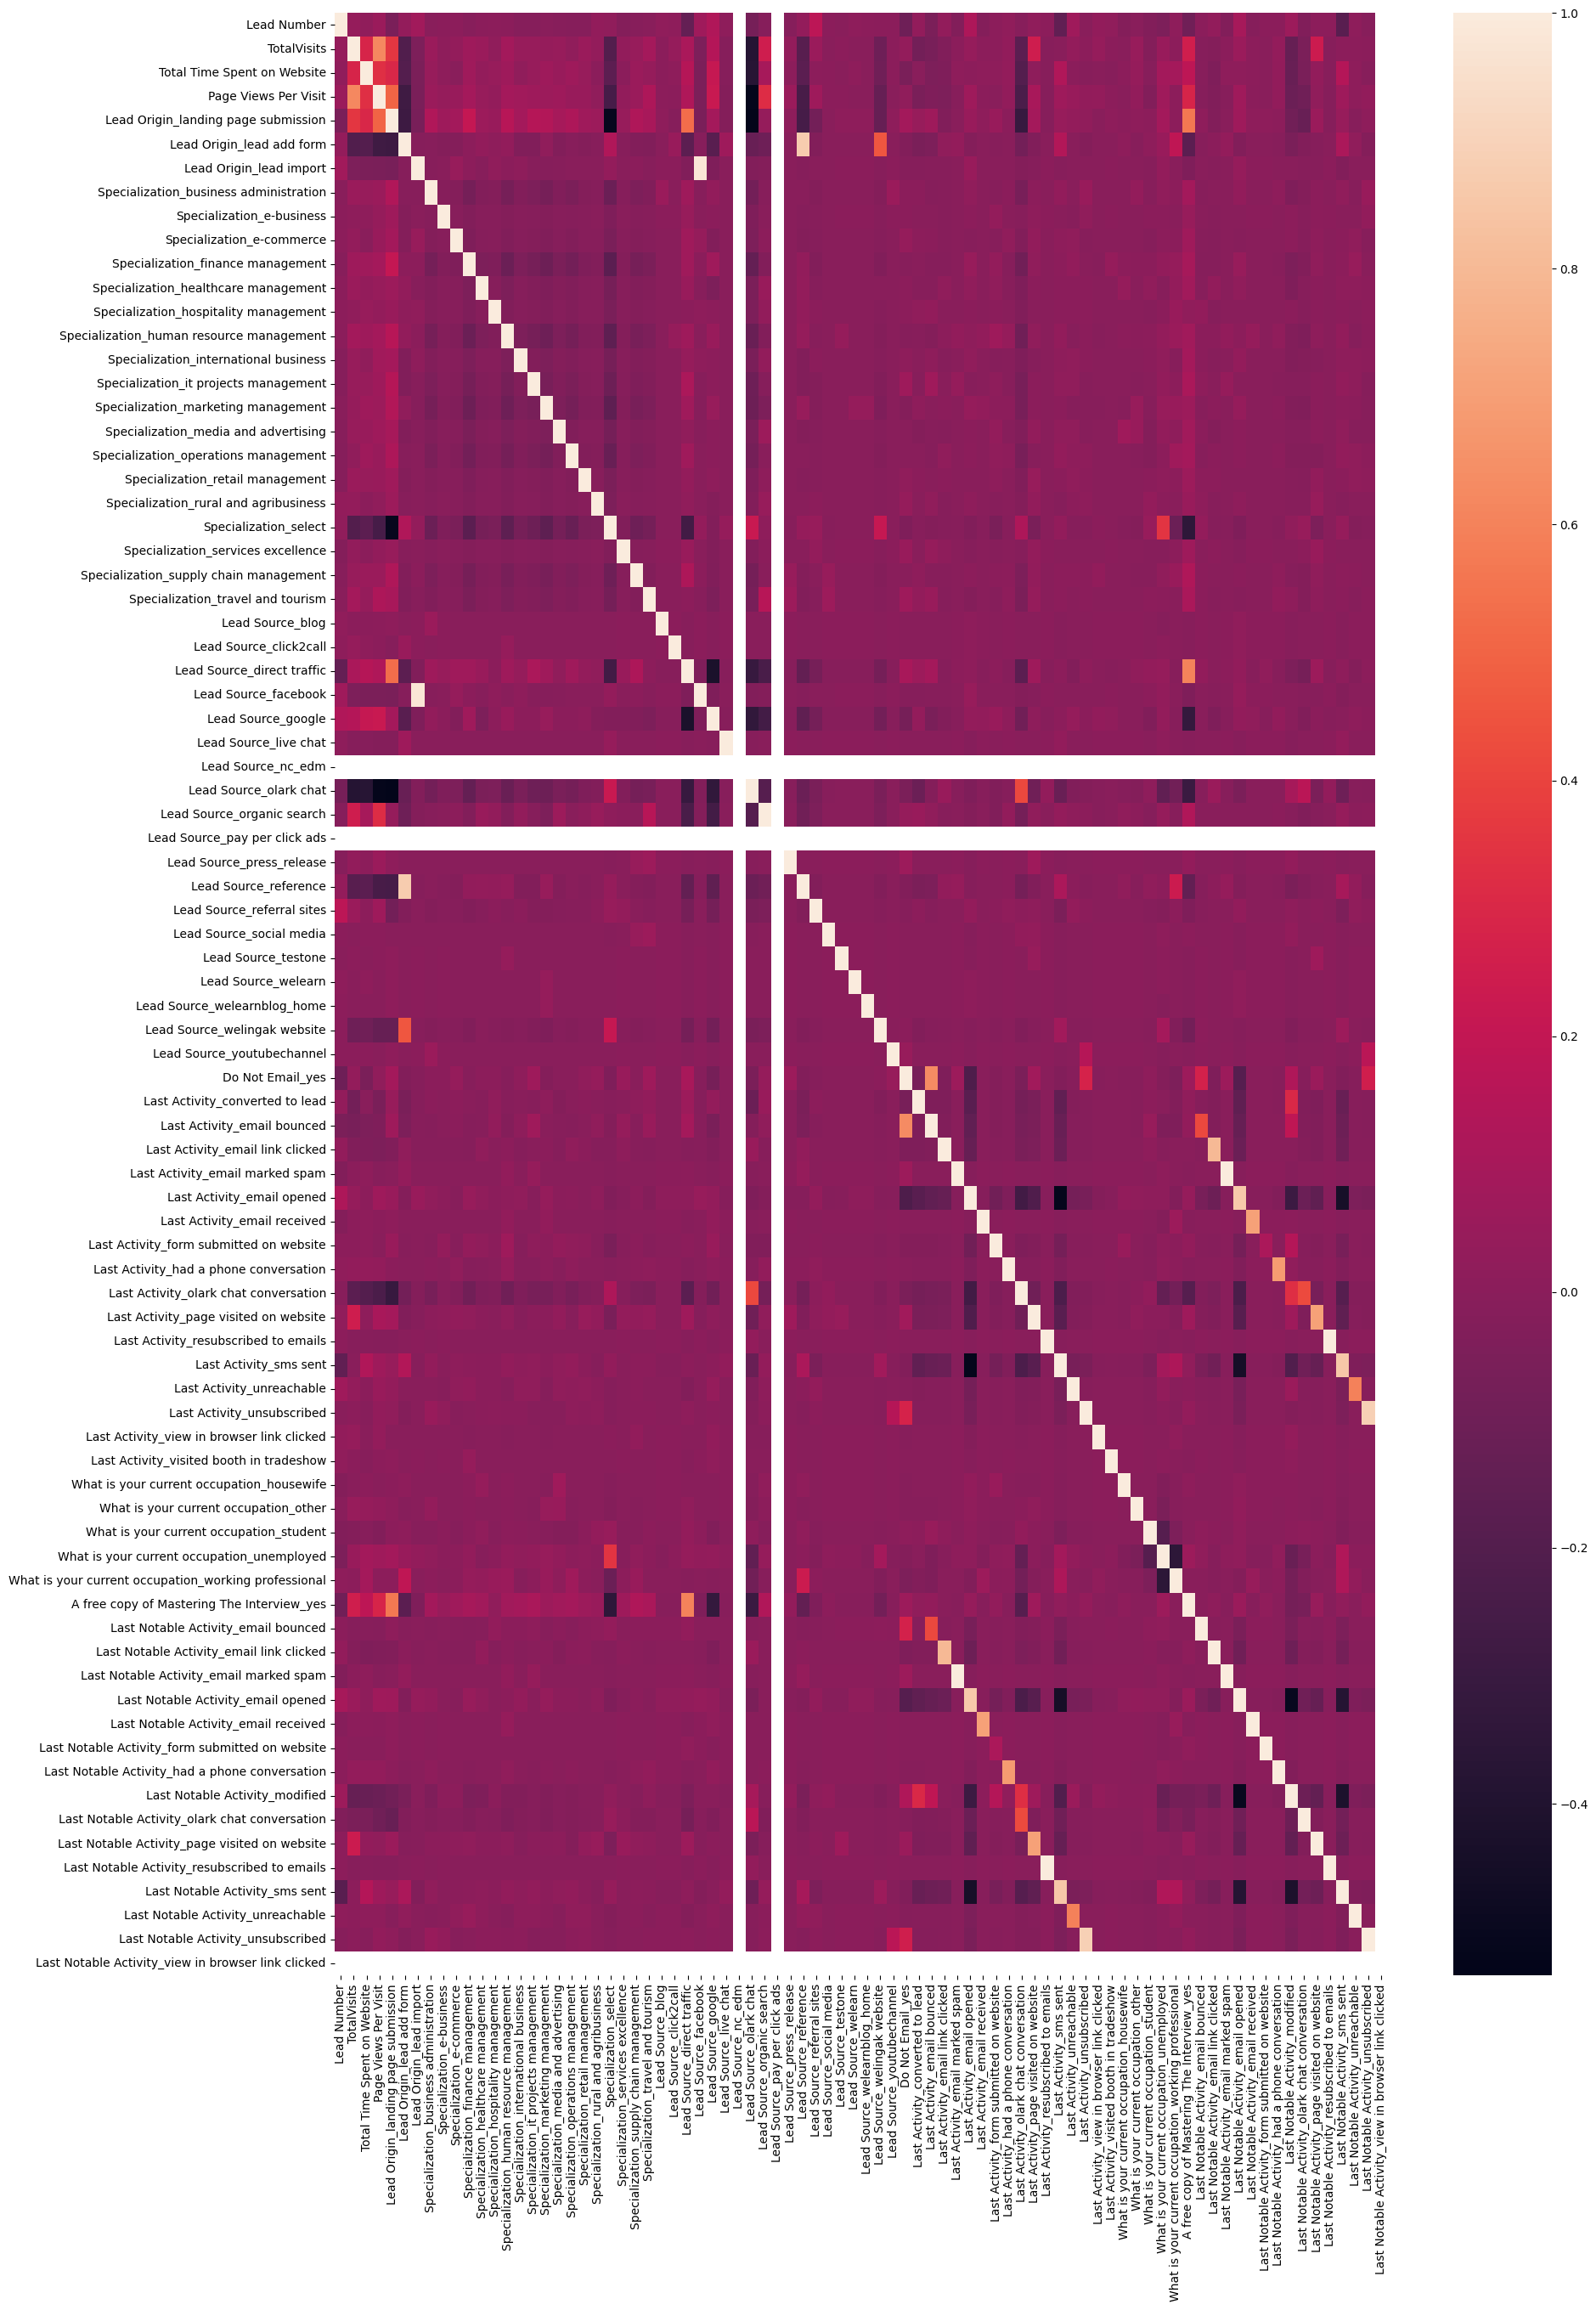

In [820]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. 

## Logistic Regression Model Building

In [821]:
# Creating LogisticRegression Object called "logreg"
logreg = LogisticRegression()

In [822]:
# Run RFE with 20 variables
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [823]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 19),
 ('Specialization_e-business', False, 36),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 7),
 ('Specialization_healthcare management', False, 13),
 ('Specialization_hospitality management', False, 26),
 ('Specialization_human resource management', False, 3),
 ('Specialization_international business', False, 28),
 ('Specialization_it projects management', False, 29),
 ('Specialization_marketing management', False, 2),
 ('Specialization_media and advertising', False, 34),
 ('Specialization_operations management', False, 6),
 ('Specialization_retail management', False, 39),
 ('Specialization_rural and agribusiness', False, 46)

### Model 1

In [824]:
# columns selected by rfe
col = X_train.columns[rfe.support_]

In [825]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [826]:
# Importing statsmodels
import statsmodels.api as sm

In [827]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.2
Date:                Mon, 17 Apr 2023   Deviance:                       5206.4
Time:                        21:21:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7039      1.007     -7.650      0.000      -9.678      -5.730
Lead Number                                           8.216e-06   1.57e-06      5.234      0.000    5.14e-06    1.13e-05
Total Time Spent on Website                              4.6560      0.168     27.778      0.000       4.327       4.985
Lead Origin_landing page submission                     -0.1770      0.103     -1.723      0.085      -0.378       0.024
Lead Origin_lead add form                                1.2523      1.162      1.078      0.281      -1.025       3.530
Lead Source_direct traffic                              -0.1956      0.101     -1.933      0.053      -0.394       0.003
Lead Source_olark chat                                   1.1682      0.122      9.588      0.000       0.929       1.407
Lead Source_reference                                    2.2090      1.182      1.869      0.062      -0.108       4.526
Lead Source_welingak website                             4.6609      1.540      3.027      0.002       1.643       7.679
Do Not Email_yes                                        -1.0655      0.204     -5.229      0.000      -1.465      -0.666
Last Activity_converted to lead                         -0.6875      0.245     -2.809      0.005      -1.167      -0.208
Last Activity_email bounced                             -0.7794      0.403     -1.936      0.053      -1.568       0.010
Last Activity_email opened                              -0.0302      0.153     -0.198      0.843      -0.329       0.269
Last Activity_olark chat conversation                   -1.3361      0.214     -6.238      0.000      -1.756      -0.916
Last Activity_page visited on website                   -0.4099      0.200     -2.052      0.040      -0.801      -0.018
Last Activity_sms sent                                   0.5411      0.202      2.683      0.007       0.146       0.936
What is your current occupation_unemployed               0.9466      0.082     11.542      0.000       0.786       1.107
What is your current occupation_working professional     3.5183      0.206     17.075      0.000       3.114       3.922
A free copy of Mastering The Interview_yes              -0.0156      0.099     -0.158      0.875      -0.209       0.178
Last Notable Activity_modified                          -0.4520      0.108     -4.186      0.000      -0.664      -0.240
Last Notable Activity_sms sent                           0.7335      0.188      3.897      0.000       0.365       1.102
========================================================================================================================
"""

'A free copy of Mastering The Interview_yes' column will be removed from model due to high p-value of 0.875, which is above the accepted threshold of 0.05 for statistical significance

### Model 2

In [828]:
# Dropping 'A free copy of Mastering The Interview_yes' column
col=col.drop("A free copy of Mastering The Interview_yes")

In [829]:
#create model 2 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.2
Date:                Mon, 17 Apr 2023   Deviance:                       5206.4
Time:                        21:21:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7072      1.007     -7.655      0.000      -9.681      -5.734
Lead Number                                            8.22e-06   1.57e-06      5.237      0.000    5.14e-06    1.13e-05
Total Time Spent on Website                              4.6555      0.168     27.780      0.000       4.327       4.984
Lead Origin_landing page submission                     -0.1818      0.098     -1.855      0.064      -0.374       0.010
Lead Origin_lead add form                                1.2527      1.162      1.078      0.281      -1.025       3.530
Lead Source_direct traffic                              -0.2027      0.091     -2.234      0.025      -0.380      -0.025
Lead Source_olark chat                                   1.1679      0.122      9.586      0.000       0.929       1.407
Lead Source_reference                                    2.2085      1.182      1.868      0.062      -0.108       4.525
Lead Source_welingak website                             4.6608      1.540      3.027      0.002       1.643       7.678
Do Not Email_yes                                        -1.0653      0.204     -5.229      0.000      -1.465      -0.666
Last Activity_converted to lead                         -0.6868      0.245     -2.807      0.005      -1.166      -0.207
Last Activity_email bounced                             -0.7779      0.402     -1.933      0.053      -1.567       0.011
Last Activity_email opened                              -0.0297      0.153     -0.195      0.846      -0.329       0.269
Last Activity_olark chat conversation                   -1.3357      0.214     -6.236      0.000      -1.755      -0.916
Last Activity_page visited on website                   -0.4098      0.200     -2.052      0.040      -0.801      -0.018
Last Activity_sms sent                                   0.5408      0.202      2.682      0.007       0.146       0.936
What is your current occupation_unemployed               0.9463      0.082     11.541      0.000       0.786       1.107
What is your current occupation_working professional     3.5190      0.206     17.079      0.000       3.115       3.923
Last Notable Activity_modified                          -0.4515      0.108     -4.183      0.000      -0.663      -0.240
Last Notable Activity_sms sent                           0.7344      0.188      3.905      0.000       0.366       1.103
========================================================================================================================
"""

'Last Activity_email opened' column will be removed from model due to high p-value of 0.846, which is above the accepted threshold of 0.05 for statistical significance

### Model 3

In [830]:
# Dropping 'Last Activity_email opened' column
col=col.drop("Last Activity_email opened")

In [831]:
#create model 3 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.2
Date:                Mon, 17 Apr 2023   Deviance:                       5206.4
Time:                        21:21:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7386      0.994     -7.786      0.000      -9.687      -5.790
Lead Number                                           8.227e-06   1.57e-06      5.242      0.000    5.15e-06    1.13e-05
Total Time Spent on Website                              4.6550      0.168     27.782      0.000       4.327       4.983
Lead Origin_landing page submission                     -0.1813      0.098     -1.850      0.064      -0.373       0.011
Lead Origin_lead add form                                1.2516      1.162      1.077      0.281      -1.026       3.529
Lead Source_direct traffic                              -0.2031      0.091     -2.239      0.025      -0.381      -0.025
Lead Source_olark chat                                   1.1684      0.122      9.591      0.000       0.930       1.407
Lead Source_reference                                    2.2096      1.182      1.869      0.062      -0.107       4.526
Lead Source_welingak website                             4.6609      1.540      3.027      0.002       1.643       7.678
Do Not Email_yes                                        -1.0603      0.202     -5.246      0.000      -1.456      -0.664
Last Activity_converted to lead                         -0.6647      0.217     -3.063      0.002      -1.090      -0.239
Last Activity_email bounced                             -0.7588      0.390     -1.944      0.052      -1.524       0.006
Last Activity_olark chat conversation                   -1.3126      0.178     -7.358      0.000      -1.662      -0.963
Last Activity_page visited on website                   -0.3851      0.155     -2.492      0.013      -0.688      -0.082
Last Activity_sms sent                                   0.5625      0.168      3.348      0.001       0.233       0.892
What is your current occupation_unemployed               0.9463      0.082     11.542      0.000       0.786       1.107
What is your current occupation_working professional     3.5195      0.206     17.084      0.000       3.116       3.923
Last Notable Activity_modified                          -0.4463      0.105     -4.268      0.000      -0.651      -0.241
Last Notable Activity_sms sent                           0.7396      0.186      3.973      0.000       0.375       1.105
========================================================================================================================
"""

'Lead Origin_lead add form' column will be removed from model due to high p-value of 0.281, which is above the accepted threshold of 0.05 for statistical significance 

### Model 4

In [832]:
# Dropping 'Lead Origin_lead add form' column
col=col.drop("Lead Origin_lead add form")

In [833]:
#create model 4 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2603.9
Date:                Mon, 17 Apr 2023   Deviance:                       5207.8
Time:                        21:21:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4022
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.7691      0.994     -7.819      0.000      -9.716      -5.822
Lead Number                                           8.281e-06   1.57e-06      5.280      0.000    5.21e-06    1.14e-05
Total Time Spent on Website                              4.6532      0.167     27.787      0.000       4.325       4.981
Lead Origin_landing page submission                     -0.1859      0.098     -1.899      0.058      -0.378       0.006
Lead Source_direct traffic                              -0.2030      0.091     -2.238      0.025      -0.381      -0.025
Lead Source_olark chat                                   1.1664      0.122      9.585      0.000       0.928       1.405
Lead Source_reference                                    3.4562      0.236     14.638      0.000       2.993       3.919
Lead Source_welingak website                             5.9070      1.015      5.821      0.000       3.918       7.896
Do Not Email_yes                                        -1.0615      0.202     -5.251      0.000      -1.458      -0.665
Last Activity_converted to lead                         -0.6654      0.217     -3.066      0.002      -1.091      -0.240
Last Activity_email bounced                             -0.7578      0.390     -1.941      0.052      -1.523       0.007
Last Activity_olark chat conversation                   -1.3145      0.178     -7.370      0.000      -1.664      -0.965
Last Activity_page visited on website                   -0.3843      0.154     -2.489      0.013      -0.687      -0.082
Last Activity_sms sent                                   0.5626      0.168      3.348      0.001       0.233       0.892
What is your current occupation_unemployed               0.9485      0.082     11.572      0.000       0.788       1.109
What is your current occupation_working professional     3.5204      0.206     17.087      0.000       3.117       3.924
Last Notable Activity_modified                          -0.4473      0.105     -4.279      0.000      -0.652      -0.242
Last Notable Activity_sms sent                           0.7414      0.186      3.983      0.000       0.377       1.106
========================================================================================================================
"""

'Lead Origin_landing page submission' column will be removed from model due to high p-value of 0.058, which is above the accepted threshold of 0.05 for statistical significance

### Model 5

In [834]:
# Dropping 'Lead Origin_landing page submission' column
col=col.drop("Lead Origin_landing page submission")

In [835]:
#create model 5 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.7
Date:                Mon, 17 Apr 2023   Deviance:                       5211.4
Time:                        21:21:49   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.9602      0.989     -8.049      0.000      -9.899      -6.022
Lead Number                                           8.414e-06   1.57e-06      5.369      0.000    5.34e-06    1.15e-05
Total Time Spent on Website                              4.6524      0.167     27.783      0.000       4.324       4.981
Lead Source_direct traffic                              -0.2699      0.083     -3.235      0.001      -0.433      -0.106
Lead Source_olark chat                                   1.2748      0.108     11.795      0.000       1.063       1.487
Lead Source_reference                                    3.5695      0.229     15.610      0.000       3.121       4.018
Lead Source_welingak website                             6.0202      1.013      5.943      0.000       4.035       8.006
Do Not Email_yes                                        -1.0632      0.202     -5.275      0.000      -1.458      -0.668
Last Activity_converted to lead                         -0.6472      0.217     -2.986      0.003      -1.072      -0.222
Last Activity_email bounced                             -0.7607      0.390     -1.950      0.051      -1.525       0.004
Last Activity_olark chat conversation                   -1.2871      0.178     -7.244      0.000      -1.635      -0.939
Last Activity_page visited on website                   -0.3847      0.154     -2.491      0.013      -0.687      -0.082
Last Activity_sms sent                                   0.5627      0.168      3.351      0.001       0.234       0.892
What is your current occupation_unemployed               0.9429      0.082     11.519      0.000       0.782       1.103
What is your current occupation_working professional     3.5050      0.206     17.027      0.000       3.101       3.908
Last Notable Activity_modified                          -0.4454      0.105     -4.260      0.000      -0.650      -0.240
Last Notable Activity_sms sent                           0.7423      0.186      3.990      0.000       0.378       1.107
========================================================================================================================
"""

Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [836]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [837]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

,Features,VIF
0,Lead Number,7.58
1,Last Activity_sms sent,7.25
2,Last Notable Activity_sms sent,7.10
3,What is your current occupation_unemployed,3.20
4,Last Notable Activity_modified,3.07
5,Total Time Spent on Website,2.35
6,Lead Source_olark chat,1.93
7,Last Activity_email bounced,1.93
8,Do Not Email_yes,1.87
9,Last Activity_olark chat conversation,1.76


'Lead Number' column will be removed from model due to high VIF of 7.58, which is above the accepted threshold of 5

### Model 6

In [838]:
# Dropping 'Lead Number' column
col=col.drop("Lead Number")

In [839]:
#create model 6 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.2
Date:                Mon, 17 Apr 2023   Deviance:                       5240.4
Time:                        21:21:49   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6994      0.105    -25.658      0.000      -2.906      -2.493
Total Time Spent on Website                              4.6436      0.167     27.790      0.000       4.316       4.971
Lead Source_direct traffic                              -0.3397      0.082     -4.131      0.000      -0.501      -0.179
Lead Source_olark chat                                   1.2066      0.107     11.301      0.000       0.997       1.416
Lead Source_reference                                    3.5554      0.227     15.647      0.000       3.110       4.001
Lead Source_welingak website                             6.0338      1.015      5.947      0.000       4.045       8.023
Do Not Email_yes                                        -1.1330      0.201     -5.638      0.000      -1.527      -0.739
Last Activity_converted to lead                         -0.6461      0.215     -3.011      0.003      -1.067      -0.226
Last Activity_email bounced                             -0.7484      0.390     -1.921      0.055      -1.512       0.015
Last Activity_olark chat conversation                   -1.3079      0.177     -7.374      0.000      -1.656      -0.960
Last Activity_page visited on website                   -0.3868      0.154     -2.518      0.012      -0.688      -0.086
Last Activity_sms sent                                   0.5389      0.167      3.222      0.001       0.211       0.867
What is your current occupation_unemployed               0.9335      0.082     11.407      0.000       0.773       1.094
What is your current occupation_working professional     3.4868      0.205     17.016      0.000       3.085       3.888
Last Notable Activity_modified                          -0.4242      0.105     -4.057      0.000      -0.629      -0.219
Last Notable Activity_sms sent                           0.6682      0.185      3.615      0.000       0.306       1.031
========================================================================================================================
"""

'Last Activity_email bounced' column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance

### Model 7

In [840]:
# Dropping Last Activity_email bounced' column
col=col.drop("Last Activity_email bounced")

In [841]:
#create model 7 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.2
Date:                Mon, 17 Apr 2023   Deviance:                       5244.5
Time:                        21:21:50   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3987
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7042      0.105    -25.697      0.000      -2.910      -2.498
Total Time Spent on Website                              4.6430      0.167     27.809      0.000       4.316       4.970
Lead Source_direct traffic                              -0.3431      0.082     -4.175      0.000      -0.504      -0.182
Lead Source_olark chat                                   1.2036      0.107     11.271      0.000       0.994       1.413
Lead Source_reference                                    3.5758      0.227     15.719      0.000       3.130       4.022
Lead Source_welingak website                             6.0253      1.013      5.947      0.000       4.039       8.011
Do Not Email_yes                                        -1.3436      0.174     -7.734      0.000      -1.684      -1.003
Last Activity_converted to lead                         -0.6081      0.214     -2.846      0.004      -1.027      -0.189
Last Activity_olark chat conversation                   -1.2753      0.177     -7.219      0.000      -1.622      -0.929
Last Activity_page visited on website                   -0.3541      0.153     -2.315      0.021      -0.654      -0.054
Last Activity_sms sent                                   0.5852      0.166      3.527      0.000       0.260       0.910
What is your current occupation_unemployed               0.9364      0.082     11.444      0.000       0.776       1.097
What is your current occupation_working professional     3.4814      0.204     17.045      0.000       3.081       3.882
Last Notable Activity_modified                          -0.4571      0.103     -4.431      0.000      -0.659      -0.255
Last Notable Activity_sms sent                           0.6383      0.184      3.461      0.001       0.277       1.000
========================================================================================================================
"""

Now lets check VIFs again for these variables 

In [842]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

,Features,VIF
0,Last Notable Activity_sms sent,6.93
1,Last Activity_sms sent,6.89
2,Last Notable Activity_modified,2.67
3,What is your current occupation_unemployed,2.31
4,Total Time Spent on Website,1.93
5,Last Activity_olark chat conversation,1.68
6,Lead Source_olark chat,1.52
7,Lead Source_direct traffic,1.45
8,Last Activity_converted to lead,1.33
9,What is your current occupation_working profes...,1.31


'Last Notable Activity_sms sent' column will be removed from model due to high VIF of 6.93, which is above the accepted threshold of 5

### Model 8

In [843]:
# Dropping 'Last Notable Activity_sms sent' column
col=col.drop('Last Notable Activity_sms sent')

In [844]:
#create model 8 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.3
Date:                Mon, 17 Apr 2023   Deviance:                       5256.5
Time:                        21:21:50   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6848      0.105    -25.611      0.000      -2.890      -2.479
Total Time Spent on Website                              4.6408      0.167     27.813      0.000       4.314       4.968
Lead Source_direct traffic                              -0.3440      0.082     -4.196      0.000      -0.505      -0.183
Lead Source_olark chat                                   1.2065      0.107     11.322      0.000       0.998       1.415
Lead Source_reference                                    3.5616      0.228     15.642      0.000       3.115       4.008
Lead Source_welingak website                             5.9582      1.012      5.887      0.000       3.974       7.942
Do Not Email_yes                                        -1.3112      0.173     -7.558      0.000      -1.651      -0.971
Last Activity_converted to lead                         -0.4474      0.209     -2.137      0.033      -0.858      -0.037
Last Activity_olark chat conversation                   -1.1672      0.174     -6.696      0.000      -1.509      -0.826
Last Activity_page visited on website                   -0.3161      0.153     -2.065      0.039      -0.616      -0.016
Last Activity_sms sent                                   1.0944      0.076     14.354      0.000       0.945       1.244
What is your current occupation_unemployed               0.9693      0.081     11.939      0.000       0.810       1.128
What is your current occupation_working professional     3.5151      0.205     17.185      0.000       3.114       3.916
Last Notable Activity_modified                          -0.6618      0.086     -7.706      0.000      -0.830      -0.493
========================================================================================================================
"""

Now lets check VIFs again for these variables

In [845]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

,Features,VIF
0,What is your current occupation_unemployed,2.24
1,Total Time Spent on Website,1.92
2,Last Notable Activity_modified,1.92
3,Last Activity_olark chat conversation,1.60
4,Last Activity_sms sent,1.60
5,Lead Source_olark chat,1.51
6,Lead Source_direct traffic,1.45
7,What is your current occupation_working profes...,1.30
8,Last Activity_converted to lead,1.27
9,Lead Source_reference,1.23


'What is your current occupation_unemployed' column can be dropped to reduce the number of variables

### Model 9

In [846]:
# Dropping 'What is your current occupation_unemployed' column
col = col.drop('What is your current occupation_unemployed')

In [847]:
#create model 9 and check statistics
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.8
Date:                Mon, 17 Apr 2023   Deviance:                       5407.6
Time:                        21:21:50   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9731      0.080    -24.615      0.000      -2.130      -1.816
Total Time Spent on Website                              4.6472      0.164     28.290      0.000       4.325       4.969
Lead Source_direct traffic                              -0.3358      0.081     -4.146      0.000      -0.495      -0.177
Lead Source_olark chat                                   1.0774      0.103     10.415      0.000       0.875       1.280
Lead Source_reference                                    3.7370      0.227     16.464      0.000       3.292       4.182
Lead Source_welingak website                             6.2140      1.012      6.139      0.000       4.230       8.198
Do Not Email_yes                                        -1.2977      0.171     -7.571      0.000      -1.634      -0.962
Last Activity_converted to lead                         -0.3978      0.207     -1.923      0.054      -0.803       0.008
Last Activity_olark chat conversation                   -1.2079      0.172     -7.037      0.000      -1.544      -0.871
Last Activity_page visited on website                   -0.2849      0.151     -1.892      0.058      -0.580       0.010
Last Activity_sms sent                                   1.1422      0.075     15.206      0.000       0.995       1.289
What is your current occupation_working professional     2.8234      0.196     14.398      0.000       2.439       3.208
Last Notable Activity_modified                          -0.7536      0.084     -8.937      0.000      -0.919      -0.588
========================================================================================================================
"""

In [848]:
# checkVIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

,Features,VIF
0,Last Notable Activity_modified,1.90
1,Total Time Spent on Website,1.61
2,Last Activity_olark chat conversation,1.60
3,Last Activity_sms sent,1.51
4,Lead Source_olark chat,1.43
5,Lead Source_direct traffic,1.38
6,Last Activity_converted to lead,1.26
7,What is your current occupation_working profes...,1.17
8,Lead Source_reference,1.15
9,Do Not Email_yes,1.14


No variable needs to be dropped as they all have good VIF values less than 5 and all the p-values are below 0.05. So we can fix model.

## Prediction

In [849]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.705613
3604    0.234949
5584    0.555489
7679    0.289950
7563    0.410224
7978    0.766369
7780    0.142197
7863    0.985810
838     0.651916
708     0.091868
dtype: float64

In [850]:
# array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70561285, 0.23494918, 0.55548938, 0.28994988, 0.41022377,
       0.76636921, 0.14219695, 0.9858101 , 0.65191636, 0.09186833])

In [851]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.705613
1,0,0.234949
2,0,0.555489
3,0,0.289950
4,0,0.410224


In [852]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.705613,1
1,0,0.234949,0
2,0,0.555489,1
3,0,0.289950,0
4,0,0.410224,0


## Model Evaluation

In [853]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [854]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3450,  445],
       [ 742, 1714]])

In [855]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8131002991654858

That is around 81% accuracy which is a very good value

In [856]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [857]:
# Calculating the sensitivity
TP/(TP+FN)

0.6978827361563518

In [858]:
# Calculating the specificity
TN/(TN+FP)

0.8857509627727856

With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 69% and specificity of around 88%

## ROC Curve

The previous cut off was randomely selected. Now to find the optimum one

In [859]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [860]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

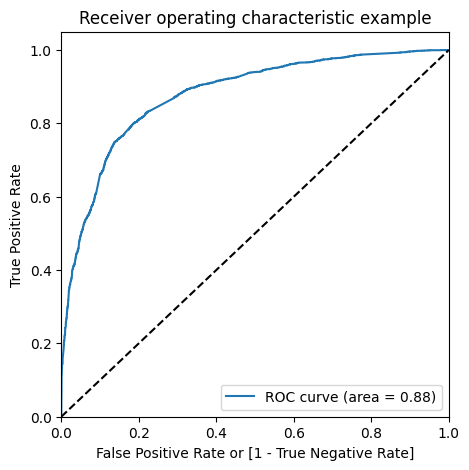

In [861]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value.

In [862]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.705613,1,1,1,1,1,1,1,1,1,0,0
1,0,0.234949,0,1,1,1,0,0,0,0,0,0,0
2,0,0.555489,1,1,1,1,1,1,1,0,0,0,0
3,0,0.289950,0,1,1,1,0,0,0,0,0,0,0
4,0,0.410224,0,1,1,1,1,1,0,0,0,0,0


In [863]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.585735,0.970684,0.343004
0.2,0.2,0.729491,0.910016,0.615661
0.3,0.3,0.798299,0.830212,0.778177
0.4,0.4,0.814045,0.760993,0.847497
0.5,0.5,0.813100,0.697883,0.885751
0.6,0.6,0.788380,0.582655,0.918100
0.7,0.7,0.776256,0.506515,0.946341
0.8,0.8,0.751063,0.403909,0.969961
0.9,0.9,0.702724,0.250000,0.988190


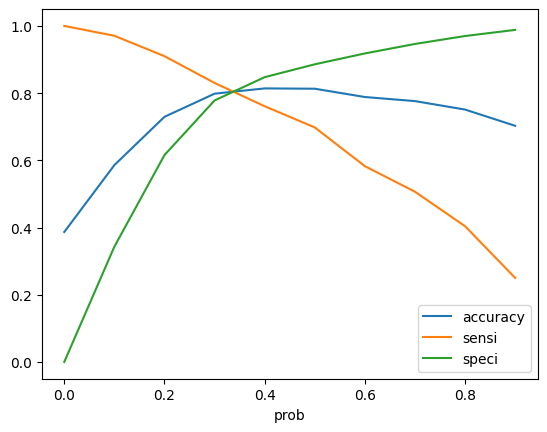

In [864]:
# Plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35

In [865]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.705613,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.234949,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.555489,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.289950,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.410224,0,1,1,1,1,1,0,0,0,0,0,1


In [866]:
# Checking the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807589356006928

In [867]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3162,  733],
       [ 489, 1967]])

In [868]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [869]:
# Calculating the sensitivity
TP/(TP+FN)

0.8008957654723127

In [870]:
# Calculating the specificity
TN/(TN+FP)

0.8118100128369705

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

##Precision and recall

In [871]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3450,  445],
       [ 742, 1714]])

In [872]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.793886058360352

In [873]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6978827361563518

With the current cut off as 0.35 we have Precision around 79% and Recall around 69%

In [874]:
# Import
from sklearn.metrics import precision_recall_curve

In [875]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [876]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

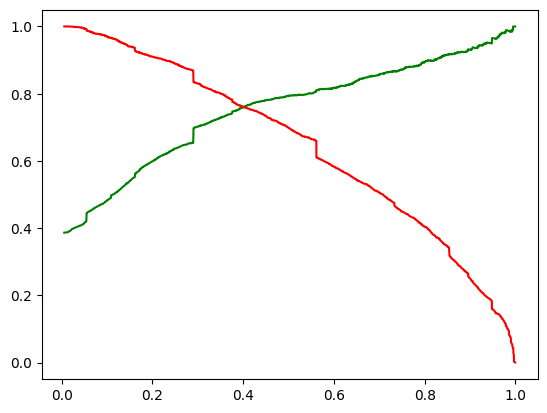

In [877]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [878]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.705613,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.234949,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.555489,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.289950,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.410224,0,1,1,1,1,1,0,0,0,0,0,1


In [879]:
# Checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140450322783813

In [880]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3301,  594],
       [ 587, 1869]])

In [881]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [882]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.758830694275274

In [883]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7609934853420195

With the current cut off as 0.4 we have Precision around 75% and Recall around 76%

## Prediction on Test Set

In [884]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [885]:
# Substituting all the columns in the final train model
col = X_train.columns

In [886]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Source_direct traffic,Lead Source_olark chat,Lead Source_reference,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_modified
8308,1.0,0.416813,1,0,0,0,0,0,0,1,0,0,1
7212,1.0,0.001320,0,0,0,0,0,0,0,0,1,1,0
2085,1.0,0.000000,0,0,0,1,0,0,0,0,0,0,0
4048,1.0,0.617077,1,0,0,0,0,0,0,0,1,0,0
4790,1.0,0.005282,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0,1,0,0,0,0,1,0,0,0,1
8179,1.0,0.148768,0,0,0,0,0,0,0,0,1,0,1
6236,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.458627,0,0,0,0,0,0,0,0,1,0,0


In [887]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,0,8308,0.196160
1,1,7212,0.880647
2,1,2085,0.985810
3,1,4048,0.845657
4,0,4790,0.092427


In [888]:
# Making prediction using cut off 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final

,Converted,Prospect ID,Conversion_Prob,final_predicted
0,0,8308,0.196160,0
1,1,7212,0.880647,1
2,1,2085,0.985810,1
3,1,4048,0.845657,1
4,0,4790,0.092427,0
...,...,...,...,...
2718,1,3261,0.054313,0
2719,0,8179,0.290449,0
2720,0,6236,0.289950,0
2721,1,5240,0.785906,1


In [889]:
# Check the accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8178479618068307

In [890]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1483,  261],
       [ 235,  744]])

In [891]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [892]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7402985074626866

In [893]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7599591419816139

With the current cut off as 0.4 we have Precision around 74% and Recall around 76%

## Conclusion

**Assigning Lead Score to the Testing data**

In [894]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,0,8308,0.196160,0,20
1,1,7212,0.880647,1,88
2,1,2085,0.985810,1,99
3,1,4048,0.845657,1,85
4,0,4790,0.092427,0,9


**Finding out the leads which should be contacted**

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [895]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
1,1,7212,0.880647,1,88
2,1,2085,0.985810,1,99
3,1,4048,0.845657,1,85
15,1,3917,0.883977,1,88
17,1,8088,0.996762,1,100
...,...,...,...,...,...
2667,1,5656,0.981183,1,98
2676,1,4198,0.902241,1,90
2680,1,2852,0.985068,1,99
2690,1,6156,0.985810,1,99


**Important Features from our final model**

In [896]:
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

array([7212, 2085, 4048, 3917, 8088, 3192, 2542, 5664, 2734, 1368, 3723,
       6933, 8229, 2722, 4677, 1408, 8592, 3725, 2489, 8541, 7840, 6906,
        460, 2760, 6665, 7082, 4913, 4154, 5687,  213, 7893, 3664, 6379,
       1424, 6269, 1214, 7214, 6028, 4250, 5300, 8787, 2490, 1619, 1820,
       1009, 4360, 5818, 4200, 3289, 1416, 5049, 2984, 7469, 4556, 8085,
       7167, 8461, 4851, 3652, 6760, 2159, 5937, 7265, 5423, 7036, 8838,
       8475, 2748, 8309, 6384, 4194, 7962, 5801, 6617, 1354, 8495, 3498,
       2127, 7467, 5877, 9016, 2979, 2675, 2692, 4947, 1542, 1026, 3350,
       9158, 3288, 7970, 4157, 5019,  737, 1765, 6460, 2914, 6684, 1200,
       3286, 8343, 3836, 4795, 2011, 4359, 6290, 4049, 3019, 7168, 4568,
       3207, 4890, 8261, 4179, 7417, 7187, 5503, 8082, 3456, 2643, 3449,
       2674, 4675, 3455, 2110, 8396, 4525, 7641, 5695, 2378, 1767, 8867,
       8801, 6792, 8921, 1534, 8268, 8267, 5535, 3285, 6811, 7105, 3958,
       8282, 7128, 3033, 4080, 3919, 2594, 2397, 34

In [897]:
res.params.sort_values(ascending=False)

Lead Source_welingak website                            6.214002
Total Time Spent on Website                             4.647219
Lead Source_reference                                   3.737047
What is your current occupation_working professional    2.823351
Last Activity_sms sent                                  1.142150
Lead Source_olark chat                                  1.077441
Last Activity_page visited on website                  -0.284946
Lead Source_direct traffic                             -0.335836
Last Activity_converted to lead                        -0.397794
Last Notable Activity_modified                         -0.753641
Last Activity_olark chat conversation                  -1.207883
Do Not Email_yes                                       -1.297652
const                                                  -1.973069
dtype: float64

## Recommendations

**Company should contact the following leads as they are more likely to get conevrted**
- Leads coming from the lead sources "Welingak Websites" and "Reference".
- Leads who spent "more time on the websites".
- Leads who are the "working professionals".
- Leads whose last activity was "SMS Sent".
- Leads coming from the lead sources "Olark Chat".

**Company should not contact the following leads as they are not likely to get conevrted**
- Leads whose last activity was "Olark Chat Conversation".
- Leads who chose the option of "Do not Email" as "yes".
